In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

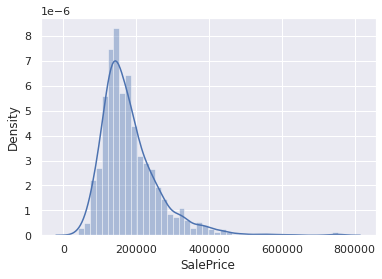

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

num_features = data.select_dtypes(include=np.number).columns.tolist()
X_nf = data[num_features].drop(columns=["SalePrice"])
num_features = X_nf.columns
X_nf = X_nf.fillna(method='ffill')
X_nf.isna().mean()

X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_nf, y, test_size=0.3, random_state=10)

lr = linear_model.LinearRegression()
lr.fit(X_train_nf, y_train_nf)
print ("LinearRegression:", lr.score(X_test_nf, y_test_nf))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test_nf), y_test_nf)))

rid = linear_model.Ridge()
rid.fit(X_train_nf, y_train_nf)
print ("Ridge:", rid.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", np.sqrt(mean_squared_error(rid.predict(X_test_nf), y_test_nf)))

lasso = linear_model.Lasso()
lasso.fit(X_train_nf, y_train_nf)
print ("Lasso:", lasso.score(X_test_nf, y_test_nf))
print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X_test_nf), y_test_nf)))

LinearRegression: 0.8240530264920538
LR RMSE: 32105.63123711511
Ridge: 0.8241760908934097
Ridge RMSE: 32094.401287164947
Lasso: 0.8240673393450961
Lasso RMSE: 32104.325353534907


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [8]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def rmse(y, y_first):
    return np.sqrt( np.mean( np.square(y - y_first) ) )

cross_validate(linear_model.Lasso(),
              X_nf, y, cv=7,
              scoring = {'RMSE': make_scorer(rmse)})

{'fit_time': array([0.03297806, 0.03115726, 0.02749681, 0.01020336, 0.01306152,
        0.00885892, 0.00874877]),
 'score_time': array([0.00870132, 0.00347877, 0.00358415, 0.00352478, 0.00336552,
        0.0029223 , 0.00318575]),
 'test_RMSE': array([29343.8645144 , 27637.89602794, 37199.89571716, 40545.71620776,
        28073.2874923 , 43468.77545936, 55400.41777115])}

In [9]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

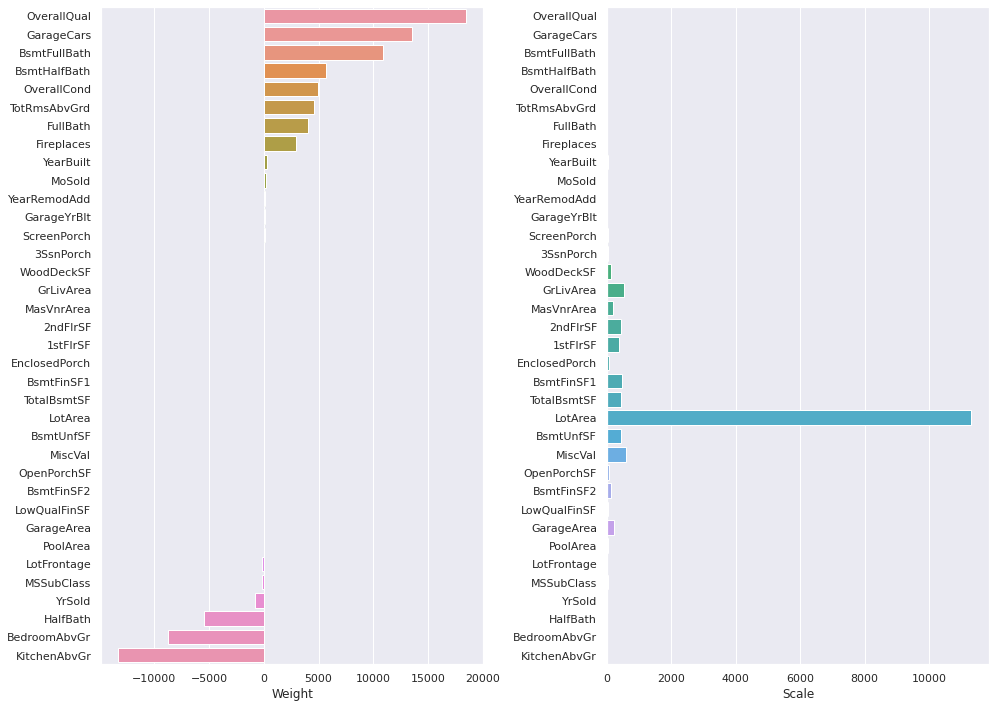

In [11]:
show_weights(num_features, lr.coef_, X_train[num_features].std())

In [12]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train_nf)
X_train_sc = sc.transform(X_train_nf)
X_test_sc  = sc.transform(X_test_nf)

lr.fit(X_train_sc, y_train_nf)
print ("LinearRegression:", lr.score(X_test_sc, y_test_nf))
print ("LR RMSE:", rmse(lr.predict(X_test_sc), y_test_nf))

rid.fit(X_train_sc, y_train_nf)
print ("Ridge:", rid.score(X_test_sc, y_test_nf))
print ("Ridge RMSE:", rmse(rid.predict(X_test_sc), y_test_nf))

lasso.fit(X_train_sc, y_train_nf)
print ("Lasso:", lasso.score(X_test_sc, y_test_nf))
print ("Lasso RMSE:", rmse(lasso.predict(X_test_sc), y_test_nf))

LinearRegression: 0.8241207744360194
LR RMSE: 32099.44954532105
Ridge: 0.8241731199561593
Ridge RMSE: 32094.67243927961
Lasso: 0.8240642066311792
Lasso RMSE: 32104.61118226832


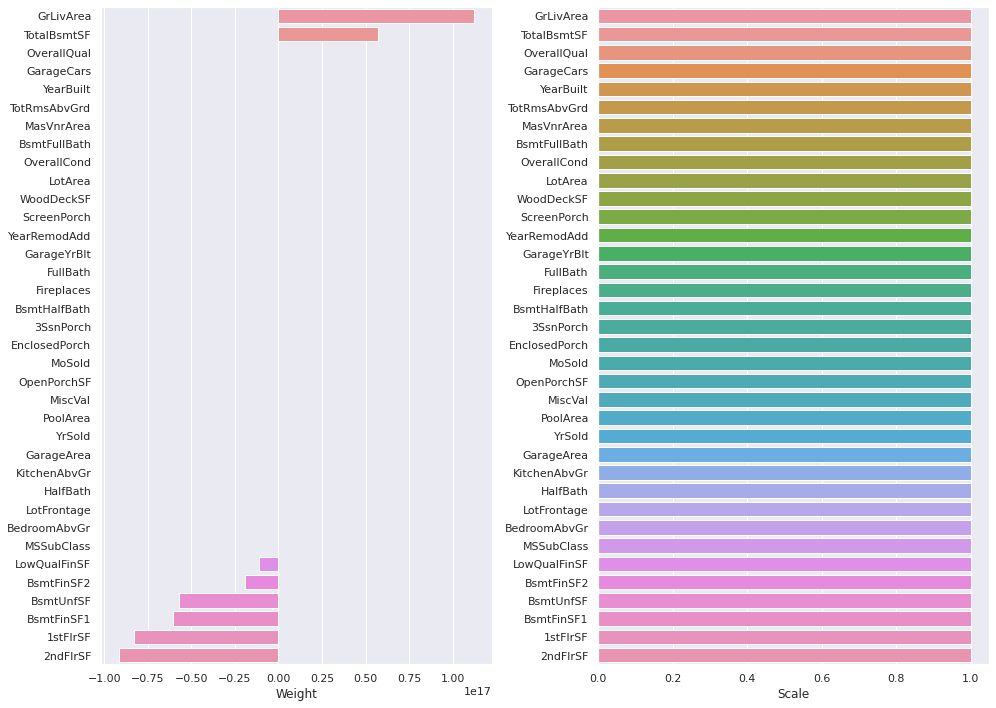

In [13]:
scales = pd.Series(data=X_train_sc.std(axis=0), index=num_features)
show_weights(num_features, lr.coef_, scales)

In [14]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO

from sklearn.model_selection import GridSearchCV

alpha_grid_search = GridSearchCV(lasso, 
                                {'alpha': np.arange(0.5, 200.1, 0.5)},
                               scoring=make_scorer(rmse, greater_is_better=False),
                               verbose=10)
alpha_grid_search.fit(X_train_sc, y_train_nf)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START alpha=0.5.................................................
[CV 1/5; 1/400] END .............alpha=0.5;, score=-43973.744 total time=   0.0s
[CV 2/5; 1/400] START alpha=0.5.................................................
[CV 2/5; 1/400] END .............alpha=0.5;, score=-32583.517 total time=   0.0s
[CV 3/5; 1/400] START alpha=0.5.................................................
[CV 3/5; 1/400] END .............alpha=0.5;, score=-54438.718 total time=   0.0s
[CV 4/5; 1/400] START alpha=0.5.................................................
[CV 4/5; 1/400] END .............alpha=0.5;, score=-48830.524 total time=   0.1s
[CV 5/5; 1/400] START alpha=0.5.................................................
[CV 5/5; 1/400] END .............alpha=0.5;, score=-28336.621 total time=   0.1s
[CV 1/5; 2/400] START alpha=1.0.................................................
[CV 1/5; 2/400] END .............alpha=1.0;, 

[CV 5/5; 11/400] END ............alpha=5.5;, score=-28325.093 total time=   0.1s
[CV 1/5; 12/400] START alpha=6.0................................................
[CV 1/5; 12/400] END ............alpha=6.0;, score=-43973.486 total time=   0.0s
[CV 2/5; 12/400] START alpha=6.0................................................
[CV 2/5; 12/400] END ............alpha=6.0;, score=-32580.346 total time=   0.0s
[CV 3/5; 12/400] START alpha=6.0................................................
[CV 3/5; 12/400] END ............alpha=6.0;, score=-54430.984 total time=   0.0s
[CV 4/5; 12/400] START alpha=6.0................................................
[CV 4/5; 12/400] END ............alpha=6.0;, score=-48816.094 total time=   0.0s
[CV 5/5; 12/400] START alpha=6.0................................................
[CV 5/5; 12/400] END ............alpha=6.0;, score=-28323.935 total time=   0.0s
[CV 1/5; 13/400] START alpha=6.5................................................
[CV 1/5; 13/400] END .......

[CV 3/5; 22/400] END ...........alpha=11.0;, score=-54416.296 total time=   0.0s
[CV 4/5; 22/400] START alpha=11.0...............................................
[CV 4/5; 22/400] END ...........alpha=11.0;, score=-48803.033 total time=   0.0s
[CV 5/5; 22/400] START alpha=11.0...............................................
[CV 5/5; 22/400] END ...........alpha=11.0;, score=-28312.408 total time=   0.0s
[CV 1/5; 23/400] START alpha=11.5...............................................
[CV 1/5; 23/400] END ...........alpha=11.5;, score=-43973.182 total time=   0.0s
[CV 2/5; 23/400] START alpha=11.5...............................................
[CV 2/5; 23/400] END ...........alpha=11.5;, score=-32577.208 total time=   0.0s
[CV 3/5; 23/400] START alpha=11.5...............................................
[CV 3/5; 23/400] END ...........alpha=11.5;, score=-54415.253 total time=   0.0s
[CV 4/5; 23/400] START alpha=11.5...............................................
[CV 4/5; 23/400] END .......

[CV 4/5; 33/400] END ...........alpha=16.5;, score=-48788.705 total time=   0.0s
[CV 5/5; 33/400] START alpha=16.5...............................................
[CV 5/5; 33/400] END ...........alpha=16.5;, score=-28299.842 total time=   0.0s
[CV 1/5; 34/400] START alpha=17.0...............................................
[CV 1/5; 34/400] END ...........alpha=17.0;, score=-43972.915 total time=   0.0s
[CV 2/5; 34/400] START alpha=17.0...............................................
[CV 2/5; 34/400] END ...........alpha=17.0;, score=-32574.140 total time=   0.0s
[CV 3/5; 34/400] START alpha=17.0...............................................
[CV 3/5; 34/400] END ...........alpha=17.0;, score=-54403.793 total time=   0.0s
[CV 4/5; 34/400] START alpha=17.0...............................................
[CV 4/5; 34/400] END ...........alpha=17.0;, score=-48787.405 total time=   0.0s
[CV 5/5; 34/400] START alpha=17.0...............................................
[CV 5/5; 34/400] END .......

[CV 5/5; 44/400] END ...........alpha=22.0;, score=-28287.393 total time=   0.0s
[CV 1/5; 45/400] START alpha=22.5...............................................
[CV 1/5; 45/400] END ...........alpha=22.5;, score=-43974.606 total time=   0.0s
[CV 2/5; 45/400] START alpha=22.5...............................................
[CV 2/5; 45/400] END ...........alpha=22.5;, score=-32571.142 total time=   0.0s
[CV 3/5; 45/400] START alpha=22.5...............................................
[CV 3/5; 45/400] END ...........alpha=22.5;, score=-54392.354 total time=   0.0s
[CV 4/5; 45/400] START alpha=22.5...............................................
[CV 4/5; 45/400] END ...........alpha=22.5;, score=-48773.123 total time=   0.0s
[CV 5/5; 45/400] START alpha=22.5...............................................
[CV 5/5; 45/400] END ...........alpha=22.5;, score=-28286.268 total time=   0.0s
[CV 1/5; 46/400] START alpha=23.0...............................................
[CV 1/5; 46/400] END .......

[CV 1/5; 56/400] END ...........alpha=28.0;, score=-43974.914 total time=   0.0s
[CV 2/5; 56/400] START alpha=28.0...............................................
[CV 2/5; 56/400] END ...........alpha=28.0;, score=-32568.212 total time=   0.0s
[CV 3/5; 56/400] START alpha=28.0...............................................
[CV 3/5; 56/400] END ...........alpha=28.0;, score=-54380.937 total time=   0.0s
[CV 4/5; 56/400] START alpha=28.0...............................................
[CV 4/5; 56/400] END ...........alpha=28.0;, score=-48758.882 total time=   0.0s
[CV 5/5; 56/400] START alpha=28.0...............................................
[CV 5/5; 56/400] END ...........alpha=28.0;, score=-28273.948 total time=   0.0s
[CV 1/5; 57/400] START alpha=28.5...............................................
[CV 1/5; 57/400] END ...........alpha=28.5;, score=-43974.948 total time=   0.0s
[CV 2/5; 57/400] START alpha=28.5...............................................
[CV 2/5; 57/400] END .......

[CV 2/5; 67/400] END ...........alpha=33.5;, score=-32575.652 total time=   0.0s
[CV 3/5; 67/400] START alpha=33.5...............................................
[CV 3/5; 67/400] END ...........alpha=33.5;, score=-54369.543 total time=   0.0s
[CV 4/5; 67/400] START alpha=33.5...............................................
[CV 4/5; 67/400] END ...........alpha=33.5;, score=-48751.118 total time=   0.0s
[CV 5/5; 67/400] START alpha=33.5...............................................
[CV 5/5; 67/400] END ...........alpha=33.5;, score=-28261.747 total time=   0.0s
[CV 1/5; 68/400] START alpha=34.0...............................................
[CV 1/5; 68/400] END ...........alpha=34.0;, score=-43975.335 total time=   0.0s
[CV 2/5; 68/400] START alpha=34.0...............................................
[CV 2/5; 68/400] END ...........alpha=34.0;, score=-32575.549 total time=   0.0s
[CV 3/5; 68/400] START alpha=34.0...............................................
[CV 3/5; 68/400] END .......

[CV 3/5; 78/400] END ...........alpha=39.0;, score=-54358.169 total time=   0.0s
[CV 4/5; 78/400] START alpha=39.0...............................................
[CV 4/5; 78/400] END ...........alpha=39.0;, score=-48738.017 total time=   0.0s
[CV 5/5; 78/400] START alpha=39.0...............................................
[CV 5/5; 78/400] END ...........alpha=39.0;, score=-28249.665 total time=   0.0s
[CV 1/5; 79/400] START alpha=39.5...............................................
[CV 1/5; 79/400] END ...........alpha=39.5;, score=-43975.758 total time=   0.1s
[CV 2/5; 79/400] START alpha=39.5...............................................
[CV 2/5; 79/400] END ...........alpha=39.5;, score=-32574.459 total time=   0.0s
[CV 3/5; 79/400] START alpha=39.5...............................................
[CV 3/5; 79/400] END ...........alpha=39.5;, score=-54357.137 total time=   0.0s
[CV 4/5; 79/400] START alpha=39.5...............................................
[CV 4/5; 79/400] END .......

[CV 2/5; 89/400] END ...........alpha=44.5;, score=-32568.809 total time=   0.0s
[CV 3/5; 89/400] START alpha=44.5...............................................
[CV 3/5; 89/400] END ...........alpha=44.5;, score=-54346.818 total time=   0.0s
[CV 4/5; 89/400] START alpha=44.5...............................................
[CV 4/5; 89/400] END ...........alpha=44.5;, score=-48724.957 total time=   0.0s
[CV 5/5; 89/400] START alpha=44.5...............................................
[CV 5/5; 89/400] END ...........alpha=44.5;, score=-28237.701 total time=   0.0s
[CV 1/5; 90/400] START alpha=45.0...............................................
[CV 1/5; 90/400] END ...........alpha=45.0;, score=-43975.639 total time=   0.0s
[CV 2/5; 90/400] START alpha=45.0...............................................
[CV 2/5; 90/400] END ...........alpha=45.0;, score=-32568.657 total time=   0.0s
[CV 3/5; 90/400] START alpha=45.0...............................................
[CV 3/5; 90/400] END .......

[CV 4/5; 99/400] END ...........alpha=49.5;, score=-48713.120 total time=   0.0s
[CV 5/5; 99/400] START alpha=49.5...............................................
[CV 5/5; 99/400] END ...........alpha=49.5;, score=-28226.928 total time=   0.0s
[CV 1/5; 100/400] START alpha=50.0..............................................
[CV 1/5; 100/400] END ..........alpha=50.0;, score=-43974.982 total time=   0.0s
[CV 2/5; 100/400] START alpha=50.0..............................................
[CV 2/5; 100/400] END ..........alpha=50.0;, score=-32567.182 total time=   0.0s
[CV 3/5; 100/400] START alpha=50.0..............................................
[CV 3/5; 100/400] END ..........alpha=50.0;, score=-54335.489 total time=   0.0s
[CV 4/5; 100/400] START alpha=50.0..............................................
[CV 4/5; 100/400] END ..........alpha=50.0;, score=-48711.938 total time=   0.0s
[CV 5/5; 100/400] START alpha=50.0..............................................
[CV 5/5; 100/400] END ......

[CV 5/5; 110/400] END ..........alpha=55.0;, score=-28215.191 total time=   0.0s
[CV 1/5; 111/400] START alpha=55.5..............................................
[CV 1/5; 111/400] END ..........alpha=55.5;, score=-43974.059 total time=   0.0s
[CV 2/5; 111/400] START alpha=55.5..............................................
[CV 2/5; 111/400] END ..........alpha=55.5;, score=-32565.719 total time=   0.0s
[CV 3/5; 111/400] START alpha=55.5..............................................
[CV 3/5; 111/400] END ..........alpha=55.5;, score=-54324.181 total time=   0.0s
[CV 4/5; 111/400] START alpha=55.5..............................................
[CV 4/5; 111/400] END ..........alpha=55.5;, score=-48695.988 total time=   0.0s
[CV 5/5; 111/400] START alpha=55.5..............................................
[CV 5/5; 111/400] END ..........alpha=55.5;, score=-28214.130 total time=   0.0s
[CV 1/5; 112/400] START alpha=56.0..............................................
[CV 1/5; 112/400] END ......

[CV 1/5; 122/400] END ..........alpha=61.0;, score=-43973.499 total time=   0.0s
[CV 2/5; 122/400] START alpha=61.0..............................................
[CV 2/5; 122/400] END ..........alpha=61.0;, score=-32564.245 total time=   0.0s
[CV 3/5; 122/400] START alpha=61.0..............................................
[CV 3/5; 122/400] END ..........alpha=61.0;, score=-54316.406 total time=   0.0s
[CV 4/5; 122/400] START alpha=61.0..............................................
[CV 4/5; 122/400] END ..........alpha=61.0;, score=-48682.805 total time=   0.0s
[CV 5/5; 122/400] START alpha=61.0..............................................
[CV 5/5; 122/400] END ..........alpha=61.0;, score=-28202.523 total time=   0.0s
[CV 1/5; 123/400] START alpha=61.5..............................................
[CV 1/5; 123/400] END ..........alpha=61.5;, score=-43973.458 total time=   0.0s
[CV 2/5; 123/400] START alpha=61.5..............................................
[CV 2/5; 123/400] END ......

[CV 2/5; 132/400] END ..........alpha=66.0;, score=-32562.841 total time=   0.0s
[CV 3/5; 132/400] START alpha=66.0..............................................
[CV 3/5; 132/400] END ..........alpha=66.0;, score=-54299.745 total time=   0.0s
[CV 4/5; 132/400] START alpha=66.0..............................................
[CV 4/5; 132/400] END ..........alpha=66.0;, score=-48670.791 total time=   0.0s
[CV 5/5; 132/400] START alpha=66.0..............................................
[CV 5/5; 132/400] END ..........alpha=66.0;, score=-28193.028 total time=   0.0s
[CV 1/5; 133/400] START alpha=66.5..............................................
[CV 1/5; 133/400] END ..........alpha=66.5;, score=-43972.971 total time=   0.0s
[CV 2/5; 133/400] START alpha=66.5..............................................
[CV 2/5; 133/400] END ..........alpha=66.5;, score=-32562.716 total time=   0.0s
[CV 3/5; 133/400] START alpha=66.5..............................................
[CV 3/5; 133/400] END ......

[CV 5/5; 142/400] END ..........alpha=71.0;, score=-28182.321 total time=   0.0s
[CV 1/5; 143/400] START alpha=71.5..............................................
[CV 1/5; 143/400] END ..........alpha=71.5;, score=-43972.444 total time=   0.0s
[CV 2/5; 143/400] START alpha=71.5..............................................
[CV 2/5; 143/400] END ..........alpha=71.5;, score=-32561.367 total time=   0.0s
[CV 3/5; 143/400] START alpha=71.5..............................................
[CV 3/5; 143/400] END ..........alpha=71.5;, score=-54287.978 total time=   0.0s
[CV 4/5; 143/400] START alpha=71.5..............................................
[CV 4/5; 143/400] END ..........alpha=71.5;, score=-48657.613 total time=   0.0s
[CV 5/5; 143/400] START alpha=71.5..............................................
[CV 5/5; 143/400] END ..........alpha=71.5;, score=-28181.188 total time=   0.0s
[CV 1/5; 144/400] START alpha=72.0..............................................
[CV 1/5; 144/400] END ......

[CV 3/5; 154/400] END ..........alpha=77.0;, score=-54274.340 total time=   0.0s
[CV 4/5; 154/400] START alpha=77.0..............................................
[CV 4/5; 154/400] END ..........alpha=77.0;, score=-48644.599 total time=   0.0s
[CV 5/5; 154/400] START alpha=77.0..............................................
[CV 5/5; 154/400] END ..........alpha=77.0;, score=-28169.620 total time=   0.0s
[CV 1/5; 155/400] START alpha=77.5..............................................
[CV 1/5; 155/400] END ..........alpha=77.5;, score=-43971.826 total time=   0.0s
[CV 2/5; 155/400] START alpha=77.5..............................................
[CV 2/5; 155/400] END ..........alpha=77.5;, score=-32559.851 total time=   0.0s
[CV 3/5; 155/400] START alpha=77.5..............................................
[CV 3/5; 155/400] END ..........alpha=77.5;, score=-54273.125 total time=   0.0s
[CV 4/5; 155/400] START alpha=77.5..............................................
[CV 4/5; 155/400] END ......

[CV 3/5; 166/400] END ..........alpha=83.0;, score=-54260.228 total time=   0.0s
[CV 4/5; 166/400] START alpha=83.0..............................................
[CV 4/5; 166/400] END ..........alpha=83.0;, score=-48630.338 total time=   0.0s
[CV 5/5; 166/400] START alpha=83.0..............................................
[CV 5/5; 166/400] END ..........alpha=83.0;, score=-28157.285 total time=   0.0s
[CV 1/5; 167/400] START alpha=83.5..............................................
[CV 1/5; 167/400] END ..........alpha=83.5;, score=-43971.241 total time=   0.0s
[CV 2/5; 167/400] START alpha=83.5..............................................
[CV 2/5; 167/400] END ..........alpha=83.5;, score=-32558.401 total time=   0.0s
[CV 3/5; 167/400] START alpha=83.5..............................................
[CV 3/5; 167/400] END ..........alpha=83.5;, score=-54258.870 total time=   0.0s
[CV 4/5; 167/400] START alpha=83.5..............................................
[CV 4/5; 167/400] END ......

[CV 5/5; 176/400] END ..........alpha=88.0;, score=-28147.765 total time=   0.0s
[CV 1/5; 177/400] START alpha=88.5..............................................
[CV 1/5; 177/400] END ..........alpha=88.5;, score=-43970.756 total time=   0.0s
[CV 2/5; 177/400] START alpha=88.5..............................................
[CV 2/5; 177/400] END ..........alpha=88.5;, score=-32557.282 total time=   0.0s
[CV 3/5; 177/400] START alpha=88.5..............................................
[CV 3/5; 177/400] END ..........alpha=88.5;, score=-54246.633 total time=   0.0s
[CV 4/5; 177/400] START alpha=88.5..............................................
[CV 4/5; 177/400] END ..........alpha=88.5;, score=-48617.317 total time=   0.0s
[CV 5/5; 177/400] START alpha=88.5..............................................
[CV 5/5; 177/400] END ..........alpha=88.5;, score=-28146.825 total time=   0.0s
[CV 1/5; 178/400] START alpha=89.0..............................................
[CV 1/5; 178/400] END ......

[CV 5/5; 187/400] END ..........alpha=93.5;, score=-28137.548 total time=   0.0s
[CV 1/5; 188/400] START alpha=94.0..............................................
[CV 1/5; 188/400] END ..........alpha=94.0;, score=-43970.328 total time=   0.0s
[CV 2/5; 188/400] START alpha=94.0..............................................
[CV 2/5; 188/400] END ..........alpha=94.0;, score=-32556.086 total time=   0.0s
[CV 3/5; 188/400] START alpha=94.0..............................................
[CV 3/5; 188/400] END ..........alpha=94.0;, score=-54233.621 total time=   0.0s
[CV 4/5; 188/400] START alpha=94.0..............................................
[CV 4/5; 188/400] END ..........alpha=94.0;, score=-48604.379 total time=   0.0s
[CV 5/5; 188/400] START alpha=94.0..............................................
[CV 5/5; 188/400] END ..........alpha=94.0;, score=-28136.648 total time=   0.0s
[CV 1/5; 189/400] START alpha=94.5..............................................
[CV 1/5; 189/400] END ......

[CV 4/5; 199/400] END ..........alpha=99.5;, score=-48591.504 total time=   0.0s
[CV 5/5; 199/400] START alpha=99.5..............................................
[CV 5/5; 199/400] END ..........alpha=99.5;, score=-28126.957 total time=   0.0s
[CV 1/5; 200/400] START alpha=100.0.............................................
[CV 1/5; 200/400] END .........alpha=100.0;, score=-43969.808 total time=   0.0s
[CV 2/5; 200/400] START alpha=100.0.............................................
[CV 2/5; 200/400] END .........alpha=100.0;, score=-32554.883 total time=   0.0s
[CV 3/5; 200/400] START alpha=100.0.............................................
[CV 3/5; 200/400] END .........alpha=100.0;, score=-54219.205 total time=   0.0s
[CV 4/5; 200/400] START alpha=100.0.............................................
[CV 4/5; 200/400] END .........alpha=100.0;, score=-48590.292 total time=   0.0s
[CV 5/5; 200/400] START alpha=100.0.............................................
[CV 5/5; 200/400] END ......

[CV 5/5; 211/400] END .........alpha=105.5;, score=-28116.026 total time=   0.0s
[CV 1/5; 212/400] START alpha=106.0.............................................
[CV 1/5; 212/400] END .........alpha=106.0;, score=-43969.198 total time=   0.0s
[CV 2/5; 212/400] START alpha=106.0.............................................
[CV 2/5; 212/400] END .........alpha=106.0;, score=-32553.762 total time=   0.0s
[CV 3/5; 212/400] START alpha=106.0.............................................
[CV 3/5; 212/400] END .........alpha=106.0;, score=-54205.346 total time=   0.0s
[CV 4/5; 212/400] START alpha=106.0.............................................
[CV 4/5; 212/400] END .........alpha=106.0;, score=-48576.278 total time=   0.0s
[CV 5/5; 212/400] START alpha=106.0.............................................
[CV 5/5; 212/400] END .........alpha=106.0;, score=-28115.117 total time=   0.0s
[CV 1/5; 213/400] START alpha=106.5.............................................
[CV 1/5; 213/400] END ......

[CV 3/5; 224/400] END .........alpha=112.0;, score=-54191.359 total time=   0.0s
[CV 4/5; 224/400] START alpha=112.0.............................................
[CV 4/5; 224/400] END .........alpha=112.0;, score=-48562.295 total time=   0.0s
[CV 5/5; 224/400] START alpha=112.0.............................................
[CV 5/5; 224/400] END .........alpha=112.0;, score=-28104.323 total time=   0.0s
[CV 1/5; 225/400] START alpha=112.5.............................................
[CV 1/5; 225/400] END .........alpha=112.5;, score=-43968.894 total time=   0.0s
[CV 2/5; 225/400] START alpha=112.5.............................................
[CV 2/5; 225/400] END .........alpha=112.5;, score=-32552.619 total time=   0.0s
[CV 3/5; 225/400] START alpha=112.5.............................................
[CV 3/5; 225/400] END .........alpha=112.5;, score=-54190.485 total time=   0.0s
[CV 4/5; 225/400] START alpha=112.5.............................................
[CV 4/5; 225/400] END ......

[CV 2/5; 235/400] END .........alpha=117.5;, score=-32551.837 total time=   0.0s
[CV 3/5; 235/400] START alpha=117.5.............................................
[CV 3/5; 235/400] END .........alpha=117.5;, score=-54178.666 total time=   0.0s
[CV 4/5; 235/400] START alpha=117.5.............................................
[CV 4/5; 235/400] END .........alpha=117.5;, score=-48549.474 total time=   0.0s
[CV 5/5; 235/400] START alpha=117.5.............................................
[CV 5/5; 235/400] END .........alpha=117.5;, score=-28094.567 total time=   0.0s
[CV 1/5; 236/400] START alpha=118.0.............................................
[CV 1/5; 236/400] END .........alpha=118.0;, score=-43968.557 total time=   0.0s
[CV 2/5; 236/400] START alpha=118.0.............................................
[CV 2/5; 236/400] END .........alpha=118.0;, score=-32551.751 total time=   0.0s
[CV 3/5; 236/400] START alpha=118.0.............................................
[CV 3/5; 236/400] END ......

[CV 3/5; 246/400] END .........alpha=123.0;, score=-54166.092 total time=   0.0s
[CV 4/5; 246/400] START alpha=123.0.............................................
[CV 4/5; 246/400] END .........alpha=123.0;, score=-48536.789 total time=   0.0s
[CV 5/5; 246/400] START alpha=123.0.............................................
[CV 5/5; 246/400] END .........alpha=123.0;, score=-28084.902 total time=   0.0s
[CV 1/5; 247/400] START alpha=123.5.............................................
[CV 1/5; 247/400] END .........alpha=123.5;, score=-43967.802 total time=   0.0s
[CV 2/5; 247/400] START alpha=123.5.............................................
[CV 2/5; 247/400] END .........alpha=123.5;, score=-32550.943 total time=   0.0s
[CV 3/5; 247/400] START alpha=123.5.............................................
[CV 3/5; 247/400] END .........alpha=123.5;, score=-54164.954 total time=   0.0s
[CV 4/5; 247/400] START alpha=123.5.............................................
[CV 4/5; 247/400] END ......

[CV 5/5; 257/400] END .........alpha=128.5;, score=-28075.408 total time=   0.0s
[CV 1/5; 258/400] START alpha=129.0.............................................
[CV 1/5; 258/400] END .........alpha=129.0;, score=-43967.220 total time=   0.0s
[CV 2/5; 258/400] START alpha=129.0.............................................
[CV 2/5; 258/400] END .........alpha=129.0;, score=-32550.211 total time=   0.0s
[CV 3/5; 258/400] START alpha=129.0.............................................
[CV 3/5; 258/400] END .........alpha=129.0;, score=-54152.033 total time=   0.0s
[CV 4/5; 258/400] START alpha=129.0.............................................
[CV 4/5; 258/400] END .........alpha=129.0;, score=-48522.893 total time=   0.0s
[CV 5/5; 258/400] START alpha=129.0.............................................
[CV 5/5; 258/400] END .........alpha=129.0;, score=-28074.544 total time=   0.0s
[CV 1/5; 259/400] START alpha=129.5.............................................
[CV 1/5; 259/400] END ......

[CV 3/5; 269/400] START alpha=134.5.............................................
[CV 3/5; 269/400] END .........alpha=134.5;, score=-54139.426 total time=   0.0s
[CV 4/5; 269/400] START alpha=134.5.............................................
[CV 4/5; 269/400] END .........alpha=134.5;, score=-48510.262 total time=   0.1s
[CV 5/5; 269/400] START alpha=134.5.............................................
[CV 5/5; 269/400] END .........alpha=134.5;, score=-28065.113 total time=   0.2s
[CV 1/5; 270/400] START alpha=135.0.............................................
[CV 1/5; 270/400] END .........alpha=135.0;, score=-43966.754 total time=   0.1s
[CV 2/5; 270/400] START alpha=135.0.............................................
[CV 2/5; 270/400] END .........alpha=135.0;, score=-32549.493 total time=   0.1s
[CV 3/5; 270/400] START alpha=135.0.............................................
[CV 3/5; 270/400] END .........alpha=135.0;, score=-54138.427 total time=   0.1s
[CV 4/5; 270/400] START alph

[CV 3/5; 281/400] END .........alpha=140.5;, score=-54125.686 total time=   0.0s
[CV 4/5; 281/400] START alpha=140.5.............................................
[CV 4/5; 281/400] END .........alpha=140.5;, score=-48496.449 total time=   0.0s
[CV 5/5; 281/400] START alpha=140.5.............................................
[CV 5/5; 281/400] END .........alpha=140.5;, score=-28055.030 total time=   0.0s
[CV 1/5; 282/400] START alpha=141.0.............................................
[CV 1/5; 282/400] END .........alpha=141.0;, score=-43965.512 total time=   0.0s
[CV 2/5; 282/400] START alpha=141.0.............................................
[CV 2/5; 282/400] END .........alpha=141.0;, score=-32548.842 total time=   0.0s
[CV 3/5; 282/400] START alpha=141.0.............................................
[CV 3/5; 282/400] END .........alpha=141.0;, score=-54124.344 total time=   0.0s
[CV 4/5; 282/400] START alpha=141.0.............................................
[CV 4/5; 282/400] END ......

[CV 5/5; 293/400] END .........alpha=146.5;, score=-28045.038 total time=   0.0s
[CV 1/5; 294/400] START alpha=147.0.............................................
[CV 1/5; 294/400] END .........alpha=147.0;, score=-43963.403 total time=   0.0s
[CV 2/5; 294/400] START alpha=147.0.............................................
[CV 2/5; 294/400] END .........alpha=147.0;, score=-32548.296 total time=   0.0s
[CV 3/5; 294/400] START alpha=147.0.............................................
[CV 3/5; 294/400] END .........alpha=147.0;, score=-54110.897 total time=   0.0s
[CV 4/5; 294/400] START alpha=147.0.............................................
[CV 4/5; 294/400] END .........alpha=147.0;, score=-48481.611 total time=   0.0s
[CV 5/5; 294/400] START alpha=147.0.............................................
[CV 5/5; 294/400] END .........alpha=147.0;, score=-28044.174 total time=   0.0s
[CV 1/5; 295/400] START alpha=147.5.............................................
[CV 1/5; 295/400] END ......

[CV 1/5; 305/400] START alpha=152.5.............................................
[CV 1/5; 305/400] END .........alpha=152.5;, score=-43961.524 total time=   0.0s
[CV 2/5; 305/400] START alpha=152.5.............................................
[CV 2/5; 305/400] END .........alpha=152.5;, score=-32547.865 total time=   0.0s
[CV 3/5; 305/400] START alpha=152.5.............................................
[CV 3/5; 305/400] END .........alpha=152.5;, score=-54098.071 total time=   0.0s
[CV 4/5; 305/400] START alpha=152.5.............................................
[CV 4/5; 305/400] END .........alpha=152.5;, score=-48469.132 total time=   0.0s
[CV 5/5; 305/400] START alpha=152.5.............................................
[CV 5/5; 305/400] END .........alpha=152.5;, score=-28035.145 total time=   0.0s
[CV 1/5; 306/400] START alpha=153.0.............................................
[CV 1/5; 306/400] END .........alpha=153.0;, score=-43961.341 total time=   0.0s
[CV 2/5; 306/400] START alph

[CV 2/5; 318/400] END .........alpha=159.0;, score=-32547.425 total time=   0.0s
[CV 3/5; 318/400] START alpha=159.0.............................................
[CV 3/5; 318/400] END .........alpha=159.0;, score=-54083.255 total time=   0.0s
[CV 4/5; 318/400] START alpha=159.0.............................................
[CV 4/5; 318/400] END .........alpha=159.0;, score=-48454.368 total time=   0.0s
[CV 5/5; 318/400] START alpha=159.0.............................................
[CV 5/5; 318/400] END .........alpha=159.0;, score=-28024.663 total time=   0.0s
[CV 1/5; 319/400] START alpha=159.5.............................................
[CV 1/5; 319/400] END .........alpha=159.5;, score=-43959.164 total time=   0.0s
[CV 2/5; 319/400] START alpha=159.5.............................................
[CV 2/5; 319/400] END .........alpha=159.5;, score=-32547.402 total time=   0.0s
[CV 3/5; 319/400] START alpha=159.5.............................................
[CV 3/5; 319/400] END ......

[CV 3/5; 328/400] END .........alpha=164.0;, score=-54072.096 total time=   0.1s
[CV 4/5; 328/400] START alpha=164.0.............................................
[CV 4/5; 328/400] END .........alpha=164.0;, score=-48443.051 total time=   0.1s
[CV 5/5; 328/400] START alpha=164.0.............................................
[CV 5/5; 328/400] END .........alpha=164.0;, score=-28016.635 total time=   0.1s
[CV 1/5; 329/400] START alpha=164.5.............................................
[CV 1/5; 329/400] END .........alpha=164.5;, score=-43957.687 total time=   0.1s
[CV 2/5; 329/400] START alpha=164.5.............................................
[CV 2/5; 329/400] END .........alpha=164.5;, score=-32547.157 total time=   0.1s
[CV 3/5; 329/400] START alpha=164.5.............................................
[CV 3/5; 329/400] END .........alpha=164.5;, score=-54070.910 total time=   0.1s
[CV 4/5; 329/400] START alpha=164.5.............................................
[CV 4/5; 329/400] END ......

[CV 4/5; 339/400] END .........alpha=169.5;, score=-48430.658 total time=   0.0s
[CV 5/5; 339/400] START alpha=169.5.............................................
[CV 5/5; 339/400] END .........alpha=169.5;, score=-28008.033 total time=   0.0s
[CV 1/5; 340/400] START alpha=170.0.............................................
[CV 1/5; 340/400] END .........alpha=170.0;, score=-43955.746 total time=   0.0s
[CV 2/5; 340/400] START alpha=170.0.............................................
[CV 2/5; 340/400] END .........alpha=170.0;, score=-32546.948 total time=   0.0s
[CV 3/5; 340/400] START alpha=170.0.............................................
[CV 3/5; 340/400] END .........alpha=170.0;, score=-54058.133 total time=   0.0s
[CV 4/5; 340/400] START alpha=170.0.............................................
[CV 4/5; 340/400] END .........alpha=170.0;, score=-48429.527 total time=   0.0s
[CV 5/5; 340/400] START alpha=170.0.............................................
[CV 5/5; 340/400] END ......

[CV 5/5; 351/400] END .........alpha=175.5;, score=-27998.637 total time=   0.0s
[CV 1/5; 352/400] START alpha=176.0.............................................
[CV 1/5; 352/400] END .........alpha=176.0;, score=-43953.864 total time=   0.0s
[CV 2/5; 352/400] START alpha=176.0.............................................
[CV 2/5; 352/400] END .........alpha=176.0;, score=-32546.797 total time=   0.0s
[CV 3/5; 352/400] START alpha=176.0.............................................
[CV 3/5; 352/400] END .........alpha=176.0;, score=-54044.535 total time=   0.0s
[CV 4/5; 352/400] START alpha=176.0.............................................
[CV 4/5; 352/400] END .........alpha=176.0;, score=-48416.065 total time=   0.0s
[CV 5/5; 352/400] START alpha=176.0.............................................
[CV 5/5; 352/400] END .........alpha=176.0;, score=-27997.870 total time=   0.0s
[CV 1/5; 353/400] START alpha=176.5.............................................
[CV 1/5; 353/400] END ......

[CV 3/5; 362/400] END .........alpha=181.0;, score=-54033.091 total time=   0.0s
[CV 4/5; 362/400] START alpha=181.0.............................................
[CV 4/5; 362/400] END .........alpha=181.0;, score=-48404.818 total time=   0.0s
[CV 5/5; 362/400] START alpha=181.0.............................................
[CV 5/5; 362/400] END .........alpha=181.0;, score=-27990.231 total time=   0.0s
[CV 1/5; 363/400] START alpha=181.5.............................................
[CV 1/5; 363/400] END .........alpha=181.5;, score=-43952.246 total time=   0.0s
[CV 2/5; 363/400] START alpha=181.5.............................................
[CV 2/5; 363/400] END .........alpha=181.5;, score=-32546.712 total time=   0.0s
[CV 3/5; 363/400] START alpha=181.5.............................................
[CV 3/5; 363/400] END .........alpha=181.5;, score=-54031.991 total time=   0.0s
[CV 4/5; 363/400] START alpha=181.5.............................................
[CV 4/5; 363/400] END ......

[CV 4/5; 372/400] END .........alpha=186.0;, score=-48393.694 total time=   0.0s
[CV 5/5; 372/400] START alpha=186.0.............................................
[CV 5/5; 372/400] END .........alpha=186.0;, score=-27982.646 total time=   0.0s
[CV 1/5; 373/400] START alpha=186.5.............................................
[CV 1/5; 373/400] END .........alpha=186.5;, score=-43950.653 total time=   0.0s
[CV 2/5; 373/400] START alpha=186.5.............................................
[CV 2/5; 373/400] END .........alpha=186.5;, score=-32546.716 total time=   0.0s
[CV 3/5; 373/400] START alpha=186.5.............................................
[CV 3/5; 373/400] END .........alpha=186.5;, score=-54020.757 total time=   0.0s
[CV 4/5; 373/400] START alpha=186.5.............................................
[CV 4/5; 373/400] END .........alpha=186.5;, score=-48392.565 total time=   0.0s
[CV 5/5; 373/400] START alpha=186.5.............................................
[CV 5/5; 373/400] END ......

[CV 5/5; 382/400] END .........alpha=191.0;, score=-27975.196 total time=   0.1s
[CV 1/5; 383/400] START alpha=191.5.............................................
[CV 1/5; 383/400] END .........alpha=191.5;, score=-43949.152 total time=   0.1s
[CV 2/5; 383/400] START alpha=191.5.............................................
[CV 2/5; 383/400] END .........alpha=191.5;, score=-32546.786 total time=   0.1s
[CV 3/5; 383/400] START alpha=191.5.............................................
[CV 3/5; 383/400] END .........alpha=191.5;, score=-54009.348 total time=   0.1s
[CV 4/5; 383/400] START alpha=191.5.............................................
[CV 4/5; 383/400] END .........alpha=191.5;, score=-48381.452 total time=   0.1s
[CV 5/5; 383/400] START alpha=191.5.............................................
[CV 5/5; 383/400] END .........alpha=191.5;, score=-27974.447 total time=   0.1s
[CV 1/5; 384/400] START alpha=192.0.............................................
[CV 1/5; 384/400] END ......

[CV 5/5; 393/400] END .........alpha=196.5;, score=-27967.143 total time=   0.0s
[CV 1/5; 394/400] START alpha=197.0.............................................
[CV 1/5; 394/400] END .........alpha=197.0;, score=-43947.430 total time=   0.0s
[CV 2/5; 394/400] START alpha=197.0.............................................
[CV 2/5; 394/400] END .........alpha=197.0;, score=-32546.923 total time=   0.0s
[CV 3/5; 394/400] START alpha=197.0.............................................
[CV 3/5; 394/400] END .........alpha=197.0;, score=-53996.645 total time=   0.0s
[CV 4/5; 394/400] START alpha=197.0.............................................
[CV 4/5; 394/400] END .........alpha=197.0;, score=-48369.226 total time=   0.0s
[CV 5/5; 394/400] START alpha=197.0.............................................
[CV 5/5; 394/400] END .........alpha=197.0;, score=-27966.400 total time=   0.0s
[CV 1/5; 395/400] START alpha=197.5.............................................
[CV 1/5; 395/400] END ......

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,...
       171.5, 172. , 172.5, 173. , 173.5, 174. , 174.5, 175. , 175.5,
       176. , 176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5, 180. ,
       180.5, 181. , 181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5,
       185. , 185.5, 186. , 186.5, 187. , 187.5, 188. , 188.5, 189. ,
       189.5, 190. , 190.5, 191. , 191.5, 192. , 192.5, 193. , 193.5,
       194. , 194.5, 195. , 195.5, 196. , 

In [15]:
print(alpha_grid_search.best_params_)
print(alpha_grid_search.best_score_)
print(alpha_grid_search.best_estimator_)

alpha_grid_search.score(X_test_sc, y_test_nf)

{'alpha': 200.0}
-41361.6638233298
Lasso(alpha=200.0)


-31934.298333641887

In [16]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO

from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', linear_model.Lasso(alpha=200.0))])
lasso_pipe.fit(X_train_nf, y_train_nf)
print ("Lasso-Pipeline:", lasso_pipe.score(X_test_nf, y_test_nf))
print("RMSE:", rmse(lasso_pipe.predict(X_test_nf), y_test_nf))

Lasso-Pipeline: 0.8259259109898534
RMSE: 31934.298333641887


In [17]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")
X_train[num_features] = X_train[num_features].fillna(method='ffill')
X_test[num_features] = X_test[num_features].fillna(method='ffill')

In [18]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
788,RM,Pave,NotGiven,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,Fa,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
309,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1004,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
531,RM,Pave,NotGiven,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,RRNn,...,Detchd,Fin,TA,Fa,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1269,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NotGiven,GdWo,NotGiven,WD,Normal


In [19]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def create_column_transformer():
    return ColumnTransformer(
           [('scale', StandardScaler(), list(map(lambda x : X_train.columns.get_loc(x), num_features))),
            ('encode', OneHotEncoder(), list(map(lambda x : X.columns.get_loc(x), categorical)))])

X[categorical] = X[categorical].fillna("NotGiven")
X[num_features] = X[num_features].fillna(method='ffill')
column_transformer = create_column_transformer()
column_transformer.fit(X)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 [0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37,
                                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53,
                                  55, 58, 60, 61, 65, 66, 67, ...]),
                                ('encode', OneHotEncoder(),
                                 [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31,
                                  32, 34, 38, 39, 40, 41, ...])])

In [20]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 304)


In [22]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

X_train_nf = column_transformer.transform(X_train)
X_test_nf = column_transformer.transform(X_test)

try:
    ridge = linear_model.Ridge()
    ridge.fit(X_train_nf, y_train_nf)
    print ("Ridge:", ridge.score(X_test_nf, y_test_nf))
    print ("Ridge RMSE:", np.sqrt(mean_squared_error(ridge.predict(X_test_nf), y_test_nf)))
except ValueError as e:
    print(e)
    
try:
    lasso = linear_model.Lasso()
    lasso.fit(X_train_nf, y_train_nf)
    print ("Lasso:", lasso.score(X_test_nf, y_test_nf))
    print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X_test_nf), y_test_nf)))
except ValueError as e:
    print(e)

Ridge: 0.8823639523467743
Ridge RMSE: 26251.886927303298
Lasso: 0.8789670042475792
Lasso RMSE: 26628.224152185092


In [23]:
lasso_pipe = Pipeline([('lasso', linear_model.Lasso())])
ridge_pipe = Pipeline([('ridge', linear_model.Ridge())])

ridge_pipe.fit(X_train_nf, y_train_nf)
print ("Ridge:", ridge_pipe.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", rmse(ridge_pipe.predict(X_test_nf), y_test_nf))

lasso_pipe.fit(X_train_nf, y_train_nf)
print ("Ridge:", lasso_pipe.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", rmse(lasso_pipe.predict(X_test_nf), y_test_nf))

Ridge: 0.8823639523467743
Ridge RMSE: 26251.886927303298
Ridge: 0.8789670042475792
Ridge RMSE: 26628.224152185092


In [27]:
ridge_zeros = np.sum(ridge_pipe.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipe.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 10
Zero weights in Lasso: 44


In [28]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

gs = GridSearchCV(linear_model.Ridge(), 
                [{'alpha': np.arange(0.6, 100.5, 0.4)},],
                cv=5,
                scoring=make_scorer(rmse, greater_is_better=False)
                )
gs.fit(X_train_nf, y_train_nf)
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 16.6}
-36810.373658445154


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

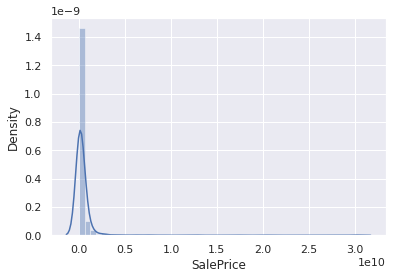

In [31]:
error = (y_train_nf - lasso.predict(X_train_nf)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [32]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

def stop_quantile(error, quantile, count):
    max = np.max(error)
    min = np.min(error)
    bins = np.linspace(min, max, count)
    
    error_classes = np.digitize(error, bins)
    nums, count = np.unique(error_classes, return_counts=True)
    sum = np.cumsum(count)
    percs = sum / sum[-1]
    
    fitting_bins = nums[percs < quantile]
    return np.isin(error_classes, fitting_bins)

stop = stop_quantile(error, 0.95, 200)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

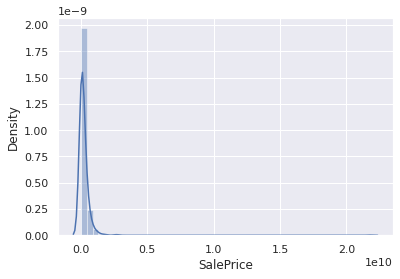

In [36]:
error = (y_train_nf[stop] - ridge.predict(X_train_nf[stop])) ** 2
sns.distplot(error)

In [37]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO

ridge = linear_model.Ridge(alpha = 16)
ridge.fit(X_train_nf[stop], y_train_nf[stop])
y_pred = ridge.predict(X_test_nf)
print(rmse(y_test_nf, y_pred))

26594.22616761304
